In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud
from sklearn.preprocessing import MaxAbsScaler
from sklearn.neighbors import NearestNeighbors
%matplotlib inline

In [3]:
df = pd.read_csv(r'C:\Users\singh\OneDrive\Desktop\datascience\Recommendation System\anime.csv')
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


Description
Unique ID of each anime.
Anime title.
Anime broadcast type, such as TV, OVA, etc.
anime genre.
The number of episodes of each anime.
The average rating for each anime compared to the number of users who gave ratings.

In [4]:
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [5]:
# Dealing with missing values
df['type'] = df['type'].fillna('None')
df['genre'] = df['genre'].fillna('None')
df['rating'] = df['rating'].fillna(df['rating'].median())
episode_ = df['episodes'].replace('Unknown', np.nan)
episode_ = episode_.fillna(episode_.median())
df.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

(-0.5, 735.5, 758.5, -0.5)

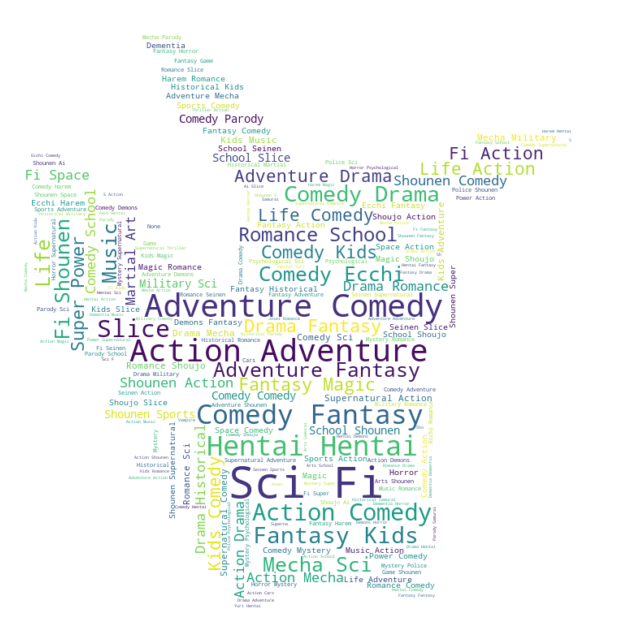

In [9]:
# Famous genres
from PIL import Image  
import matplotlib.pyplot as plt  
from wordcloud import WordCloud 

genre_list = df['genre'].to_string()
pikachu = np.array(Image.open('pikachu.jpg'))
wordcloud = WordCloud(background_color="white", mask=pikachu).generate(genre_list)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

#Looks like Sci Fi and Slice of Life are the most famous genres

In [15]:
# print(len(movies_df['movie'].unique()))
df['name'].value_counts()

name
Shi Wan Ge Leng Xiaohua                           2
Saru Kani Gassen                                  2
Bakabon Osomatsu no Karee wo Tazunete Sansenri    1
Backkom Meogeujan Yeohaeng                        1
Backkom Mission Impossible                        1
                                                 ..
Yoroiden Samurai Troopers Kikoutei Densetsu       1
Yuu☆Yuu☆Hakusho: Mu Mu Hakusho                    1
3-gatsu no Lion meets Bump of Chicken             1
Bannou Bunka Neko-Musume                          1
Yasuji no Pornorama: Yacchimae!!                  1
Name: count, Length: 12292, dtype: int64

In [16]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [17]:
df.sort_values('anime_id')
df.shape

(12294, 7)

In [18]:
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [19]:
#number of unique users in the dataset
len(df.anime_id.unique())

12294

In [20]:
df['rating'].value_counts()

rating
6.57    283
6.00    141
7.00     99
6.50     90
6.25     84
       ... 
3.47      1
3.71      1
3.87      1
3.91      1
3.14      1
Name: count, Length: 598, dtype: int64

In [21]:
len(df.name.unique())

12292

In [22]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [24]:
user_movies_df =df.pivot(index='anime_id',
                                 columns='name',
                                 values='rating')
user_movies_df

name,&quot;0&quot;,"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,&quot;Eiyuu&quot; Kaitai,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,...,s.CRY.ed,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,Üks Uks,ēlDLIVE,◯
anime_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
user_movies_df.index = df.anime_id.unique()

In [27]:
user_movies_df

name,&quot;0&quot;,"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,&quot;Eiyuu&quot; Kaitai,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,...,s.CRY.ed,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,Üks Uks,ēlDLIVE,◯
32281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
#Impute those NaNs with 0 values
user_movies_df.fillna(0, inplace=True)

In [29]:
user_movies_df

name,&quot;0&quot;,"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,&quot;Eiyuu&quot; Kaitai,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,...,s.CRY.ed,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,Üks Uks,ēlDLIVE,◯
32281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
#Calculating Cosine Similarity between Users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [31]:
user_sim = 1-pairwise_distances(user_movies_df.values,metric='cosine')

In [32]:
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [33]:
user_sim.shape

(12294, 12294)

In [34]:
np.fill_diagonal(user_sim, 0)
user_sim[0:15, 0:15]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.

In [35]:
#Store the results in a dataframe
user_sim_df = pd.DataFrame(user_sim)
user_sim_df.iloc[0:20,0:20]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
user_sim_df.shape

(12294, 12294)

In [37]:
#Set the index and column names to user ids 
user_sim_df.index = df.anime_id.unique()
user_sim_df.columns =df.anime_id.unique()

In [38]:
user_sim_df.iloc[0:15, 0:15]

,32281,5114,28977,9253,9969,32935,11061,820,15335,15417,4181,28851,918,2904,28891
32281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
user_sim_df.loc[918,5114]

0.0

In [41]:
#Most Similar Users
user_sim_df.idxmax(axis=1)[0:50]

32281    32281
5114     32281
28977    32281
9253     32281
9969     32281
32935    32281
11061    32281
820      32281
15335    32281
15417    32281
4181     32281
28851    32281
918      32281
2904     32281
28891    32281
199      32281
23273    32281
24701    32281
12355    32281
1575     32281
263      32281
44       32281
1        32281
30276    32281
164      32281
7311     32281
17074    32281
21939    32281
457      32281
2001     32281
245      32281
32983    32281
5258     32281
28957    32281
11665    32281
431      32281
11741    32281
31757    32281
19       32281
12365    32281
1535     32281
32366    32281
30654    32281
20583    32281
19647    32281
4282     32281
10379    32281
22135    32281
21329    32281
31043    32281
dtype: int64

In [42]:
user_sim_df.index

Index([32281,  5114, 28977,  9253,  9969, 32935, 11061,   820, 15335, 15417,
       ...
       26031, 34399, 10368,  9352,  5541,  9316,  5543,  5621,  6133, 26081],
      dtype='int64', length=12294)

In [43]:
user_sim_df.loc[6,168]

0.0

In [44]:
df[(df['anime_id']==6) | (df['anime_id']==168)]

,anime_id,name,genre,type,episodes,rating,members
214,6,Trigun,"Action, Comedy, Sci-Fi",TV,26,8.32,283069
1761,168,s.CRY.ed,"Action, Adventure, Drama, Sci-Fi, Super Power",TV,26,7.45,52784


In [45]:
user_1=df[df['anime_id']==6]
user_1

,anime_id,name,genre,type,episodes,rating,members
214,6,Trigun,"Action, Comedy, Sci-Fi",TV,26,8.32,283069


In [46]:
user_2=df[df['anime_id']==168]
user_2

,anime_id,name,genre,type,episodes,rating,members
1761,168,s.CRY.ed,"Action, Adventure, Drama, Sci-Fi, Super Power",TV,26,7.45,52784


In [47]:
type(user_2)

pandas.core.frame.DataFrame

In [49]:
user_2.name

1761    s.CRY.ed
Name: name, dtype: object

In [50]:
user_1.name

214    Trigun
Name: name, dtype: object

In [51]:
moview_watched_by_user1 = list(set(user_1.name))
moview_watched_by_user2 = list(set(user_2.name))
print(moview_watched_by_user1)
print(moview_watched_by_user2)

['Trigun']
['s.CRY.ed']


In [52]:
moview_watched_by_user1 = list(set(user_1.name))
moview_watched_by_user2 = list(set(user_2.name))

for movie_name in moview_watched_by_user1:
  if movie_name not in moview_watched_by_user2:
    print("Recommendation : ", movie_name)

Recommendation :  Trigun


In [ ]:
for x in user_sim_df.index:
    sim_user = user_sim_df.idxmax(axis=1)[x]
    print (x,sim_user)
    user_1=df[df['anime_id']== x]
    user_2=df[df['anime_id']== sim_user]
    moview_watched_by_user1 = list(set(user_1.name))
    moview_watched_by_user2 = list(set(user_2.name))
                                  
    for movie_name in moview_watched_by_user1:
        if movie_name not in moview_watched_by_user2:
            print("Recommendation for userid:",sim_user , movie_name)
    for movie_name in moview_watched_by_user2:
        if movie_name not in moview_watched_by_user1:
            print("Recommendation for userid:", x, movie_name)
        

32281 32281
5114 32281
Recommendation for userid: 32281 Fullmetal Alchemist: Brotherhood
Recommendation for userid: 5114 Kimi no Na wa.
28977 32281
Recommendation for userid: 32281 Gintama°
Recommendation for userid: 28977 Kimi no Na wa.
9253 32281
Recommendation for userid: 32281 Steins;Gate
Recommendation for userid: 9253 Kimi no Na wa.
9969 32281
Recommendation for userid: 32281 Gintama&#039;
Recommendation for userid: 9969 Kimi no Na wa.
32935 32281
Recommendation for userid: 32281 Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou
Recommendation for userid: 32935 Kimi no Na wa.
11061 32281
Recommendation for userid: 32281 Hunter x Hunter (2011)
Recommendation for userid: 11061 Kimi no Na wa.
820 32281
Recommendation for userid: 32281 Ginga Eiyuu Densetsu
Recommendation for userid: 820 Kimi no Na wa.
15335 32281
Recommendation for userid: 32281 Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare
Recommendation for userid: 15335 Kimi no Na wa.
15417 32281
Recommendation for u

578 32281
Recommendation for userid: 32281 Hotaru no Haka
Recommendation for userid: 578 Kimi no Na wa.
16894 32281
Recommendation for userid: 32281 Kuroko no Basket 2nd Season
Recommendation for userid: 16894 Kimi no Na wa.
5028 32281
Recommendation for userid: 32281 Major S5
Recommendation for userid: 5028 Kimi no Na wa.
21 32281
Recommendation for userid: 32281 One Piece
Recommendation for userid: 21 Kimi no Na wa.
801 32281
Recommendation for userid: 32281 Ghost in the Shell: Stand Alone Complex 2nd GIG
Recommendation for userid: 801 Kimi no Na wa.
31933 32281
Recommendation for userid: 32281 JoJo no Kimyou na Bouken: Diamond wa Kudakenai
Recommendation for userid: 31933 Kimi no Na wa.
5205 32281
Recommendation for userid: 32281 Kara no Kyoukai 7: Satsujin Kousatsu (Kou)
Recommendation for userid: 5205 Kimi no Na wa.
17389 32281
Recommendation for userid: 32281 Kingdom 2nd Season
Recommendation for userid: 17389 Kimi no Na wa.
170 32281
Recommendation for userid: 32281 Slam Dunk
Re

4155 32281
Recommendation for userid: 32281 One Piece Film: Strong World
Recommendation for userid: 4155 Kimi no Na wa.
1889 32281
Recommendation for userid: 32281 Higurashi no Naku Koro ni Kai
Recommendation for userid: 1889 Kimi no Na wa.
137 32281
Recommendation for userid: 32281 Hunter x Hunter OVA
Recommendation for userid: 137 Kimi no Na wa.
139 32281
Recommendation for userid: 32281 Hunter x Hunter: Greed Island Final
Recommendation for userid: 139 Kimi no Na wa.
23317 32281
Recommendation for userid: 32281 Kuroshitsuji: Book of Murder
Recommendation for userid: 23317 Kimi no Na wa.
558 32281
Recommendation for userid: 32281 Major S2
Recommendation for userid: 558 Kimi no Na wa.
5040 32281
Recommendation for userid: 32281 One Outs
Recommendation for userid: 5040 Kimi no Na wa.
57 32281
Recommendation for userid: 32281 Beck
Recommendation for userid: 57 Kimi no Na wa.
33 32281
Recommendation for userid: 32281 Berserk
Recommendation for userid: 33 Kimi no Na wa.
5 32281
Recommenda

6864 32281
Recommendation for userid: 32281 xxxHOLiC Rou
Recommendation for userid: 6864 Kimi no Na wa.
9735 32281
Recommendation for userid: 32281 Gintama: Shinyaku Benizakura-hen
Recommendation for userid: 9735 Kimi no Na wa.
11977 32281
Recommendation for userid: 32281 Mahou Shoujo Madoka★Magica Movie 1: Hajimari no Monogatari
Recommendation for userid: 11977 Kimi no Na wa.
11123 32281
Recommendation for userid: 32281 Sekaiichi Hatsukoi 2
Recommendation for userid: 11123 Kimi no Na wa.
23847 32281
Recommendation for userid: 32281 Yahari Ore no Seishun Love Comedy wa Machigatteiru. Zoku
Recommendation for userid: 23847 Kimi no Na wa.
33161 32281
Recommendation for userid: 32281 Yahari Ore no Seishun Love Comedy wa Machigatteiru. Zoku OVA
Recommendation for userid: 33161 Kimi no Na wa.
962 32281
Recommendation for userid: 32281 Aria The Natural
Recommendation for userid: 962 Kimi no Na wa.
1519 32281
Recommendation for userid: 32281 Black Lagoon: The Second Barrage
Recommendation for 

12477 32281
Recommendation for userid: 32281 Sakasama no Patema
Recommendation for userid: 12477 Kimi no Na wa.
4938 32281
Recommendation for userid: 32281 Tsubasa: Shunraiki
Recommendation for userid: 4938 Kimi no Na wa.
2402 32281
Recommendation for userid: 32281 Ashita no Joe
Recommendation for userid: 2402 Kimi no Na wa.
6702 32281
Recommendation for userid: 32281 Fairy Tail
Recommendation for userid: 6702 Kimi no Na wa.
1566 32281
Recommendation for userid: 32281 Ghost in the Shell: Stand Alone Complex - Solid State Society
Recommendation for userid: 1566 Kimi no Na wa.
31741 32281
Recommendation for userid: 32281 Magi: Sinbad no Bouken (TV)
Recommendation for userid: 31741 Kimi no Na wa.
440 32281
Recommendation for userid: 32281 Shoujo Kakumei Utena
Recommendation for userid: 440 Kimi no Na wa.
4107 32281
Recommendation for userid: 32281 Tengen Toppa Gurren Lagann Movie: Gurren-hen
Recommendation for userid: 4107 Kimi no Na wa.
1506 32281
Recommendation for userid: 32281 Detecti

5682 32281
Recommendation for userid: 32281 Phantom: Requiem for the Phantom
Recommendation for userid: 5682 Kimi no Na wa.
21647 32281
Recommendation for userid: 32281 Tamako Love Story
Recommendation for userid: 21647 Kimi no Na wa.
16049 32281
Recommendation for userid: 32281 Toaru Kagaku no Railgun S
Recommendation for userid: 16049 Kimi no Na wa.
1065 32281
Recommendation for userid: 32281 Touch
Recommendation for userid: 1065 Kimi no Na wa.
18179 32281
Recommendation for userid: 32281 Yowamushi Pedal
Recommendation for userid: 18179 Kimi no Na wa.
47 32281
Recommendation for userid: 32281 Akira
Recommendation for userid: 47 Kimi no Na wa.
4901 32281
Recommendation for userid: 32281 Black Lagoon: Roberta&#039;s Blood Trail
Recommendation for userid: 4901 Kimi no Na wa.
23199 32281
Recommendation for userid: 32281 Durarara!!x2 Shou
Recommendation for userid: 23199 Kimi no Na wa.
32122 32281
Recommendation for userid: 32281 Gintama: Jump Festa 2015 Special
Recommendation for userid:

3014 32281
Recommendation for userid: 32281 Ginga Eiyuu Densetsu: Waga Yuku wa Hoshi no Taikai
Recommendation for userid: 3014 Kimi no Na wa.
645 32281
Recommendation for userid: 32281 Hikaru no Go: Journey to the North Star Cup
Recommendation for userid: 645 Kimi no Na wa.
11135 32281
Recommendation for userid: 32281 Hybrid Child
Recommendation for userid: 11135 Kimi no Na wa.
5781 32281
Recommendation for userid: 32281 Isekai no Seikishi Monogatari
Recommendation for userid: 5781 Kimi no Na wa.
13767 32281
Recommendation for userid: 32281 Junjou Romantica OVA
Recommendation for userid: 13767 Kimi no Na wa.
5678 32281
Recommendation for userid: 32281 Kobato.
Recommendation for userid: 5678 Kimi no Na wa.
6774 32281
Recommendation for userid: 32281 Kuuchuu Buranko
Recommendation for userid: 6774 Kimi no Na wa.
1089 32281
Recommendation for userid: 32281 Macross: Do You Remember Love?
Recommendation for userid: 1089 Kimi no Na wa.
25161 32281
Recommendation for userid: 32281 One Piece 3

2829 32281
Recommendation for userid: 32281 Ie Naki Ko Remi
Recommendation for userid: 2829 Kimi no Na wa.
30831 32281
Recommendation for userid: 32281 Kono Subarashii Sekai ni Shukufuku wo!
Recommendation for userid: 30831 Kimi no Na wa.
416 32281
Recommendation for userid: 32281 Kurenai no Buta
Recommendation for userid: 416 Kimi no Na wa.
85 32281
Recommendation for userid: 32281 Mobile Suit Zeta Gundam
Recommendation for userid: 85 Kimi no Na wa.
30240 32281
Recommendation for userid: 32281 Prison School
Recommendation for userid: 30240 Kimi no Na wa.
1254 32281
Recommendation for userid: 32281 Saint Seiya
Recommendation for userid: 1254 Kimi no Na wa.
2605 32281
Recommendation for userid: 32281 Sayonara Zetsubou Sensei
Recommendation for userid: 2605 Kimi no Na wa.
4163 32281
Recommendation for userid: 32281 Seto no Hanayome OVA
Recommendation for userid: 4163 Kimi no Na wa.
3228 32281
Recommendation for userid: 32281 Zoku Sayonara Zetsubou Sensei
Recommendation for userid: 3228 K

Interview Questions:

Can you explain the difference between user-based and item-based collaborative filtering?
What is collaborative filtering, and how does it work?
Answer

Collaborative Filtering

Collaborative filtering (CF) is a technique used by recommender systems to predict a user's preferences for items (like movies, products, music) based on the preferences of similar users or items. It essentially leverages the wisdom of the crowd to suggest relevant items to individual users.

how it generally works:

Data Collection: The system collects data on user-item interactions. This data can come from explicit ratings (e.g., star ratings), implicit feedback (e.g., purchase history, browsing behavior), or a combination of both. Similarity Calculation: The system calculates the similarity between users or items based on their interaction patterns. For users, similarity might be measured by looking at items they both liked or disliked. For items, similarity could be based on users who liked them both or users who liked similar items.

Recommendation Generation: The system uses the calculated similarities to predict a user's preference for items they haven't interacted with yet. This can be done in two main approaches: User-Based CF: The system identifies users who are similar to the target user and recommends items those similar users liked. Item-Based CF: The system identifies items that are similar to items the user has already interacted with and recommends those similar items.

Benefits of Collaborative Filtering:

Effective for new items and users: CF can recommend new items or cater to new users even if they haven't interacted with much data yet, by leveraging similarities with existing users or items. Scalability: CF can handle large datasets efficiently and adapt to changing user preferences over time. Limitations of Collaborative Filtering:

Cold Start Problem: When a new user or item has very little interaction data, it's challenging to make accurate recommendations. Data Sparsity: If the data is sparse (not enough interactions between users and items), it can be difficult to find good similarities and make reliable predictions. Filter Bubble: CF can create a filter bubble where users are only recommended items similar to what they've already interacted with, limiting exposure to new and diverse items. User-based vs. Item-based Collaborative Filtering Here's a breakdown of the key differences between user-based and item-based CF:

User-Based CF:

Focus: Finds users with similar tastes to the target user. Recommendations: Recommends items that similar users liked. Strengths: Can be effective for discovering new and niche items based on similar user preferences. Weaknesses: Can suffer from the cold start problem for new users and may be less efficient for large datasets. Item-Based CF:

Focus: Finds items that are similar to items the user has already interacted with. Recommendations: Recommends items similar to what the user has liked in the past. Strengths: Can be effective for recommending complementary items or exploring variations within a preferred category. Weaknesses: Can get stuck in a loop of recommending similar items, limiting exploration.